 <h1 align= center><font size=10>MAJOR PROJECT</h1></font>

<h1 align=center> <font size=6> TO PREDICT CAR PRICES</font></h1>

In the following project we will be using a dataframe to understand different characteristics of a car and understand equivalent price and then train a model such that it predicts price of another dataset containing similar car characteristics.

### FEATURES DESCRIPTION:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakh

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Loading dataset as a data frame of pandas library
df=pd.read_excel('https://github.com/kalpitgupta369/Python/blob/master/Verzeo%20Major%20Project/Data_Train.xlsx?raw=true')
test=pd.read_excel('https://github.com/kalpitgupta369/Python/blob/master/Verzeo%20Major%20Project/Data_Test.xlsx?raw=true')

In [3]:
#Taking a look at the first five values of the training dataset.
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
#Taking a look at the first five values of the testing dataset.
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [5]:
print(df.shape)
print(test.shape)

(6019, 12)
(1234, 11)


In [6]:
print(df.dtypes)
print(test.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
dtype: object


We can see that the variables Engine ,Power and Mileage are of the data type object but must be converted to float for convenience

In [7]:
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
print("\n Training\n")
print(df.info())
print("\n Testing\n")
print(test.info())


 Training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
None

 Testing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column           

In [8]:
# To check if the dataset has null values
print("\n Training\n")
print(df.isnull().sum())
print("\n Testing\n")
print(test.isnull().sum())


 Training

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

 Testing

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64


In [9]:
df[df.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [10]:
test[test.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
563,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0


In [11]:
#test = test.drop(563)

In [12]:
test.shape

(1234, 11)

We can see that no duplicate rows are present in the dataset

#### Changing object data type variables , Engine ,Power and Mileage to required numeric data type.

In [13]:
df.Engine = df.Engine.str.replace('CC','')
df.Power = df.Power.str.replace('bhp','')
df.Power = df.Power.str.replace('null','0')

df.Engine = df.Engine.astype(float)
df.Power = df.Power.astype(float)

df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [14]:
test.Engine = test.Engine.str.replace('CC','')
test.Power = test.Power.str.replace('bhp','')
test.Power = test.Power.str.replace('null','0')

test.Engine=test.Engine.astype(float)
test.Power=test.Power.astype(float)

test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
dtype: object

### Name

In [15]:
t=df['Name'].nunique()
print(t)

1876


In [16]:
df[['Brand','Model']] = df.Name.str.split(n=1,expand=True)
test[['Brand','Model']] = test.Name.str.split(n=1,expand=True)

In [17]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [18]:
df.shape

(6019, 14)

In [19]:
test.shape

(1234, 13)

In [20]:
print('Data_Train\n', df['Brand'].unique())
print('Data_Test\n', test['Brand'].unique())

Data_Train
 ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
Data_Test
 ['Maruti' 'Toyota' 'Hyundai' 'Mahindra' 'Honda' 'Audi' 'Nissan' 'BMW'
 'Ford' 'Skoda' 'Volkswagen' 'Mitsubishi' 'Mercedes-Benz' 'Tata'
 'Chevrolet' 'Datsun' 'Jaguar' 'Fiat' 'Hindustan' 'Renault' 'Mini'
 'Bentley' 'Land' 'Volvo' 'Isuzu' 'Jeep' 'Porsche' 'ISUZU' 'OpelCorsa']


In [21]:
# We can see that  Isuzu and ISUZU can be clubbed together
df.loc[df['Brand'] == 'ISUZU','Brand'] = 'Isuzu'
test.loc[test['Brand'] == 'ISUZU','Brand'] = 'Isuzu'

In [22]:
print('Data_Train\n', df['Brand'].unique())
print('Data_Test\n', test['Brand'].unique())

Data_Train
 ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force' 'Bentley' 'Lamborghini']
Data_Test
 ['Maruti' 'Toyota' 'Hyundai' 'Mahindra' 'Honda' 'Audi' 'Nissan' 'BMW'
 'Ford' 'Skoda' 'Volkswagen' 'Mitsubishi' 'Mercedes-Benz' 'Tata'
 'Chevrolet' 'Datsun' 'Jaguar' 'Fiat' 'Hindustan' 'Renault' 'Mini'
 'Bentley' 'Land' 'Volvo' 'Isuzu' 'Jeep' 'Porsche' 'OpelCorsa']


In [23]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


### Replacing NaN values of Power and Engine with their mean

In [24]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [25]:
df['Power'].fillna(df['Power'].mean(),inplace=True)
df['Engine'].fillna(df['Engine'].mean(),inplace=True)
df['Seats'].fillna(df['Seats'].mode()[0],inplace=True)

df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [26]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
Brand                 0
Model                 0
dtype: int64

In [27]:
test['Power'].fillna(test['Power'].mean(),inplace=True)
test['Engine'].fillna(test['Engine'].mean(),inplace=True)
test['Seats'].fillna(test['Seats'].mode()[0],inplace=True)
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
Model                0
dtype: int64

### Power

In [28]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,1621.276450,111.227632,5.276790,9.479468
std,3.269742,9.126884e+04,599.553865,55.294789,0.806346,11.187917
min,1998.000000,1.710000e+02,72.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,160.000000


The power minimum is zero which isn't possible hence replacing it with the mean power as per the particular brand.

In [29]:
test.describe()

,Year,Kilometers_Driven,Engine,Power,Seats
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,2013.400324,58507.288493,1593.584967,108.396458,5.282010
std,3.179700,35598.702098,562.054549,52.927299,0.822366
min,1996.000000,1000.000000,624.000000,0.000000,2.000000
25%,2011.000000,34000.000000,1198.000000,74.000000,5.000000
50%,2014.000000,54572.500000,1461.000000,91.100000,5.000000
75%,2016.000000,75000.000000,1968.000000,126.300000,5.000000
max,2019.000000,350000.000000,5998.000000,616.000000,10.000000


In [30]:
df.Power[df.Power == 0] = df.Power.mean()
test.Power[test.Power == 0] = test.Power.mean()

C:\Users\Kalpit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kalpit\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df[df.Power == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [32]:
test[test.Power == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model


In [33]:
print(df.Power.min())
print(test.Power.min())

34.2
34.2


### Mileage

In [34]:

for junk in ['km/kg','kmpl']:
    df.Mileage = df.Mileage.str.replace(junk,'')
    test.Mileage=test.Mileage.str.replace(junk,'')

In [35]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [36]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [37]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.200000,4.0,Maruti,Alto K10 LXI CNG
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796.0,47.300000,5.0,Maruti,Alto 800 2016-2019 LXI
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.800000,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,108.396458,5.0,Toyota,Etios Liva GD
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197.0,82.850000,5.0,Hyundai,i20 Magna


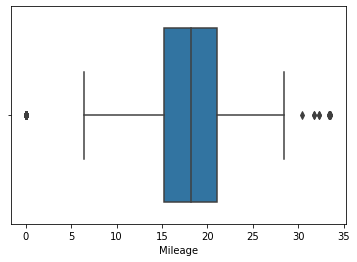

In [38]:
df["Mileage"]=df["Mileage"].astype(float)
df["Mileage"].dtypes
df['Mileage'].fillna(df['Mileage'].mean(),inplace=True)
test["Mileage"]=test["Mileage"].astype(float)
test["Mileage"].dtypes
test['Mileage'].fillna(test['Mileage'].mean(),inplace=True)
sns.boxplot(df["Mileage"]) ## Until now the mileage was considered as an object, it is important to consider it as a float

### Seats

In [39]:
print(df.Seats.unique())
print(test.Seats.unique())

[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]
[ 4.  5.  7.  6.  8. 10.  2.]


In [40]:
# To replace nan with some value
df2 = df.Seats.interpolate(method='polynomial',order=5)
testing=test.Seats.interpolate(method='polynomial',order=5)

In [41]:
print(df2.unique())
print(testing.unique())

[ 5.  7.  8.  4.  6.  2. 10.  9.  0.]
[ 4.  5.  7.  6.  8. 10.  2.]


NaN values are removed

In [42]:
df2 = df2.astype(int)
testing = testing.astype(int)

In [43]:
df['Seats']=df2
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,Audi,A4 New 2.0 TDI Multitronic


In [44]:
test['Seats']=testing
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.200000,4,Maruti,Alto K10 LXI CNG
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.300000,5,Maruti,Alto 800 2016-2019 LXI
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.800000,7,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,108.396458,5,Toyota,Etios Liva GD
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.850000,5,Hyundai,i20 Magna


In [45]:
print(df.Seats.unique())
print(test.Seats.unique())

[ 5  7  8  4  6  2 10  9  0]
[ 4  5  7  6  8 10  2]


In [46]:
df[df['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,111.227632,0,18.0,Audi,A4 3.2 FSI Tiptronic Quattro


Need to resolve this as car without seat is not possible

In [47]:
df.loc[3999]

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                           10.5
Engine                                            3197
Power                                          111.228
Seats                                                0
Price                                               18
Brand                                             Audi
Model                     A4 3.2 FSI Tiptronic Quattro
Name: 3999, dtype: object

In [48]:
df.loc[3999,'Seats']

0

In [49]:
df.Seats.mode()

0    5
dtype: int32

In [50]:
df.loc[3999,'Seats'] = 5       
#Replacing 0 with the most occured value i.e. 5

In [51]:
df.loc[3999]

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                           10.5
Engine                                            3197
Power                                          111.228
Seats                                                5
Price                                               18
Brand                                             Audi
Model                     A4 3.2 FSI Tiptronic Quattro
Name: 3999, dtype: object

In [52]:
#Re-ordering columns
df = df[['Brand','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Engine','Power','Mileage','Seats','Price']]
test = test[['Brand','Location','Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Engine','Mileage','Power','Seats']]

In [53]:
df.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Mileage,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,26.60,5,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,19.67,5,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,18.20,5,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,20.77,7,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,15.20,5,17.74


## Checking for Outliers

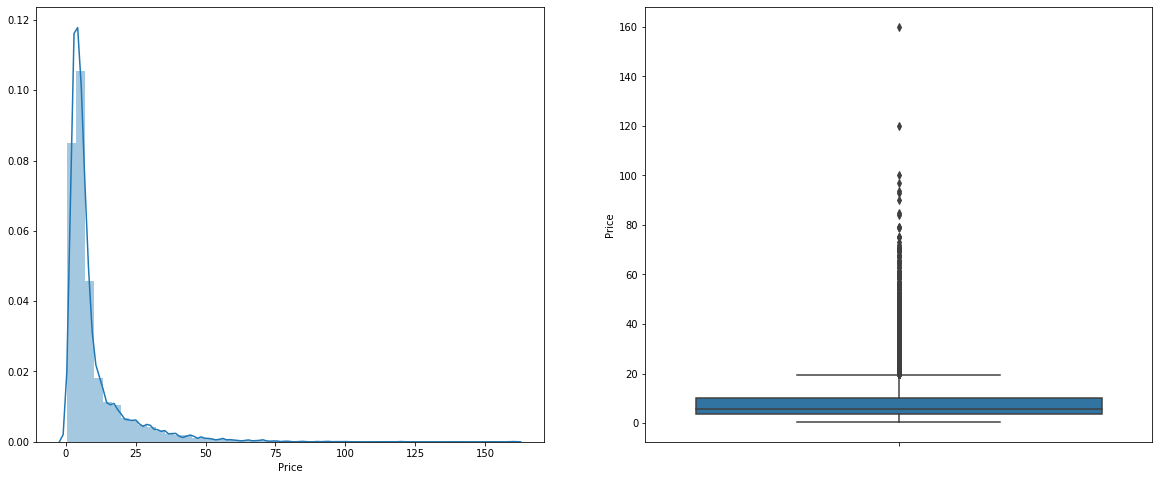

In [54]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['Price'])

plt.subplot(1,2,2)
sns.boxplot(y=df['Price'])
plt.show()

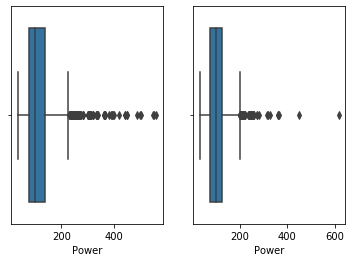

In [55]:
plt.subplot(1,2,1)
sns.boxplot(df['Power'])
plt.subplot(1,2,2)
sns.boxplot(test['Power'])

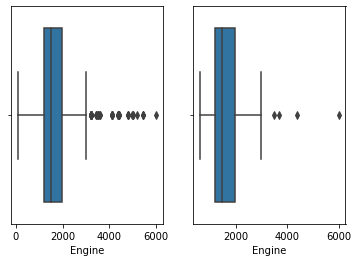

In [56]:
plt.subplot(1,2,1)
sns.boxplot(df['Engine'])
plt.subplot(1,2,2)
sns.boxplot(test['Engine'])

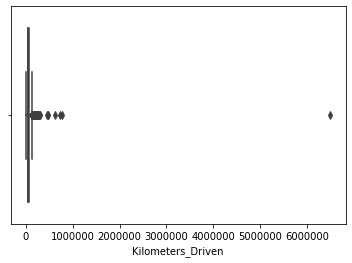

In [57]:
sns.boxplot(df['Kilometers_Driven'])

In [58]:
df_int=df
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.Kilometers_Driven))
df.Kilometers_Driven = df.Kilometers_Driven[(z < 3)]

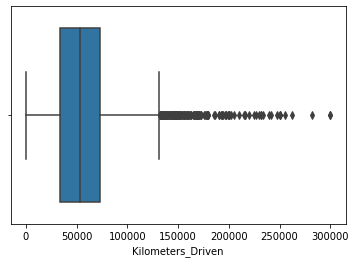

In [59]:
sns.boxplot(df['Kilometers_Driven'])

In [60]:
df.max()

Brand                 Volvo
Location               Pune
Year                   2019
Kilometers_Driven    300000
Fuel_Type            Petrol
Transmission         Manual
Owner_Type            Third
Engine                 5998
Power                   560
Mileage               33.54
Seats                    10
Price                   160
dtype: object

In [61]:
df.shape

(6019, 12)

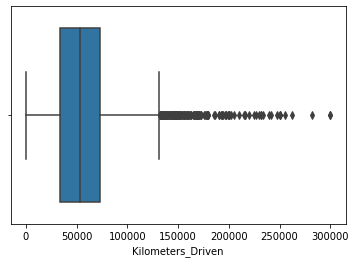

In [62]:
df=df.dropna()             #some rows are deleted here
sns.boxplot(df['Kilometers_Driven'])

In [63]:
df.shape

(6012, 12)

In [64]:
df=df.dropna()
df.isna().sum()
df.shape

(6012, 12)

### Handling Engine Outliers

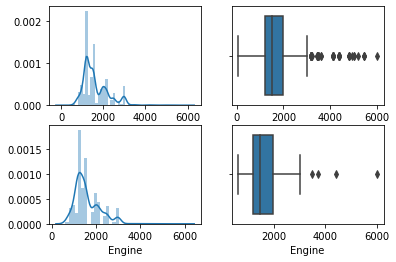

In [65]:
plt.figure()
plt.subplot(2,2,1)
sns.distplot(df['Engine'])

plt.subplot(2,2,2)
sns.boxplot(df['Engine'])

plt.subplot(2,2,3)
sns.distplot(test['Engine'])

plt.subplot(2,2,4)
sns.boxplot(test['Engine'])
plt.show()

In [66]:
df.Engine.describe()

count    6012.000000
mean     1621.098628
std       599.556362
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1971.250000
max      5998.000000
Name: Engine, dtype: float64

In [67]:
q=df.Engine.quantile(0.99) # 99 percentile of Engine value
df.Engine=df.Engine[df.Engine<q]

q=test.Engine.quantile(0.99) # 99 percentile of Engine value
test.Engine=test.Engine[test.Engine<q]

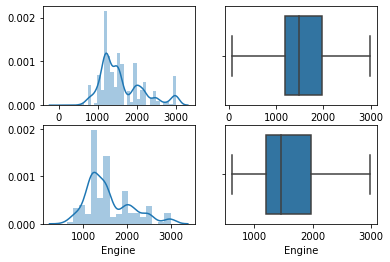

In [68]:
plt.subplot(2,2,1)
sns.distplot(df['Engine'])

plt.subplot(2,2,2)
sns.boxplot(df['Engine'])

plt.subplot(2,2,3)
sns.distplot(test['Engine'])

plt.subplot(2,2,4)
sns.boxplot(test['Engine'])
plt.show()

In [69]:
df.Engine.isna().sum()

61

In [70]:
df.Engine=df.Engine.interpolate()

In [71]:
df.Engine.isna().sum()

0

In [72]:
test.Engine.isna().sum()

22

In [73]:
test.Engine=test.Engine.interpolate()
test.Engine.isna().sum()

0

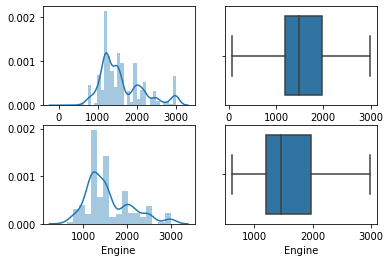

In [74]:
plt.subplot(2,2,1)
sns.distplot(df['Engine'])

plt.subplot(2,2,2)
sns.boxplot(df['Engine'])

plt.subplot(2,2,3)
sns.distplot(test['Engine'])

plt.subplot(2,2,4)
sns.boxplot(test['Engine'])
plt.show()

In [75]:
df.describe(include='all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Mileage,Seats,Price
count,6012,6012,6012.000000,6012.000000,6012,6012,6012,6012.00000,6012.000000,6012.000000,6012.000000,6012.000000
unique,30,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,1211,790,NaN,NaN,3201,4295,4922,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.357951,57140.104957,NaN,NaN,NaN,1597.28586,113.183756,18.134614,5.277944,9.473282
std,NaN,NaN,3.270678,33770.706260,NaN,NaN,NaN,548.18674,53.224528,4.583853,0.803891,11.170603
min,NaN,NaN,1998.000000,171.000000,NaN,NaN,NaN,72.00000,34.200000,0.000000,2.000000,0.440000
25%,NaN,NaN,2011.000000,34000.000000,NaN,NaN,NaN,1198.00000,78.000000,15.165000,5.000000,3.500000
50%,NaN,NaN,2014.000000,53000.000000,NaN,NaN,NaN,1493.00000,98.600000,18.150000,5.000000,5.640000
75%,NaN,NaN,2016.000000,73000.000000,NaN,NaN,NaN,1968.00000,138.030000,21.100000,5.000000,9.950000


## Data Visualization

In [76]:
c=df_int.corr()

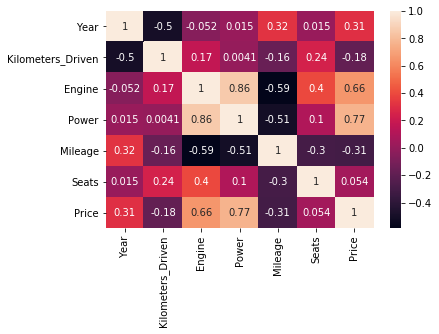

In [77]:
sns.heatmap(c,annot=True)

### Brand vs Prices

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

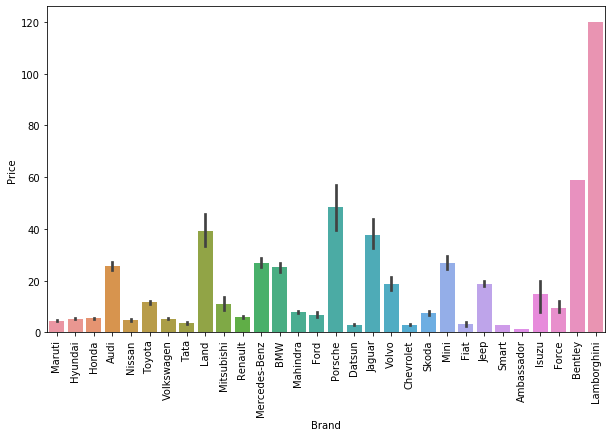

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Brand',y='Price',data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

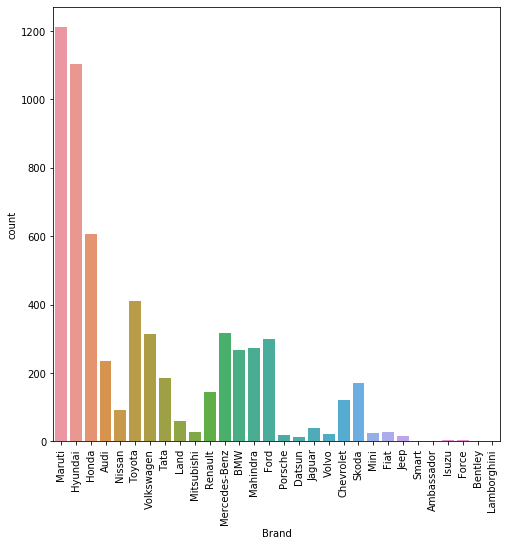

In [79]:
plt.figure(figsize=(8,8))
sns.countplot(x='Brand',data=df)
plt.xticks(rotation=90)

Graph 1 shows us that the brands Lamborghini and Bently have the highest selling Price.

But from Graph 2 we can see that the cars with highest prices are least in number

In [80]:
df['Brand'].value_counts()


Maruti           1211
Hyundai          1105
Honda             607
Toyota            411
Mercedes-Benz     318
Volkswagen        313
Ford              300
Mahindra          272
BMW               266
Audi              236
Tata              186
Skoda             172
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
Isuzu               3
Ambassador          1
Lamborghini         1
Smart               1
Bentley             1
Name: Brand, dtype: int64

The value_counts() function confirms that cars with a lower price are higher in number in the dataset , whereas cars 
with a very high price are very less

### Location vs Price


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

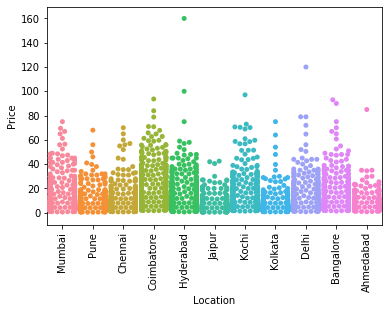

In [81]:
sns.swarmplot(x=df['Location'],y=df['Price'],data=df)
plt.xticks(rotation=90)

From the plot we can see that the prices dont vary much with respect to the location.  

### Year vs Price

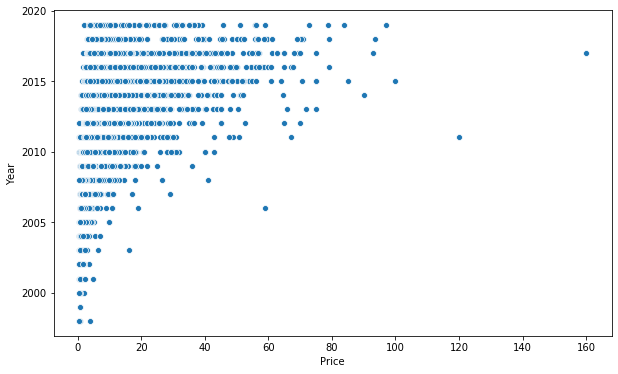

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Price', y="Year", data=df)


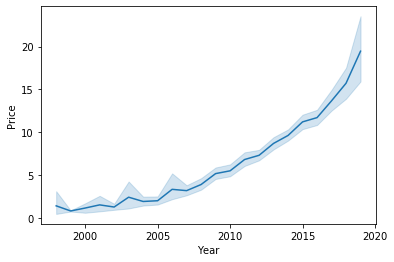

In [83]:
sns.lineplot(x='Year',y='Price',data=df)

The cars sold in the recent years ie after 2015  are being sold for a higher price than the ones before. 

The lineplot shows the increase in prices over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

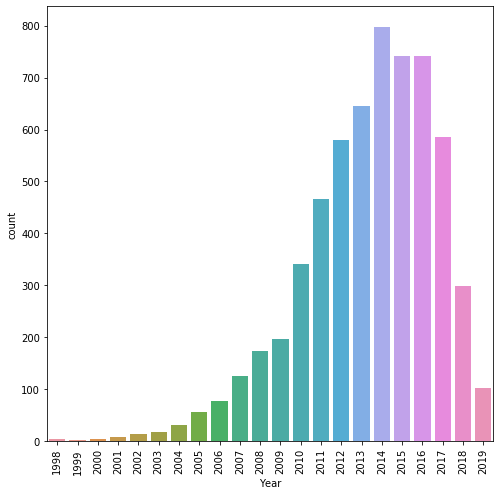

In [84]:
plt.figure(figsize=(8,8))
sns.countplot(df['Year'])
plt.xticks(rotation=90)

Most number of cars were sold in the year range 2010 to 2018 as per this dataset.

### Kilometers_Driven vs Price

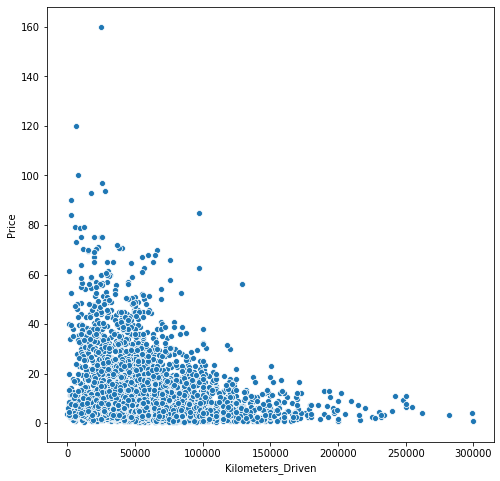

In [85]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df["Kilometers_Driven"], y=df["Price"], data=df)

From the plot we can see that cars which have been driven less are sold for a higher price

### Fuel_Type vs Price

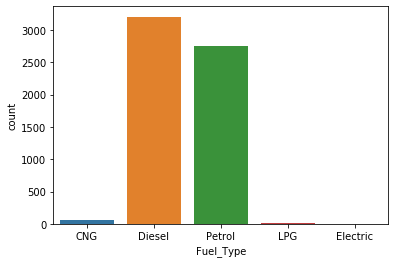

In [86]:
sns.countplot(x='Fuel_Type',data=df)

Count plot shows us that the number of CNG and LPG using vehicles are very less in the dataset as compared to the vehicles running on Diesel and Petrol.

Now lets see how the prices vary with the type of fuel.

Text(0.5, 1.0, 'Fuel vs Price')

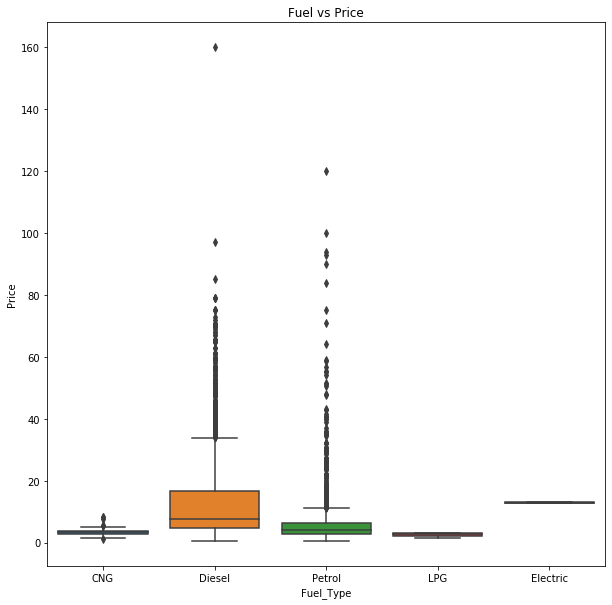

In [87]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel vs Price')

We can see that cars running on Diesel and Petrol cost the most.

### Transmission vs Prices

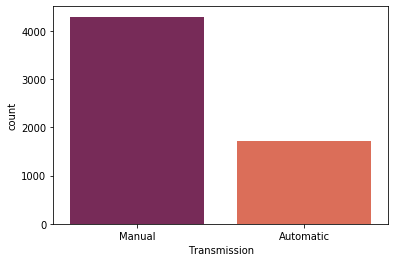

In [88]:
sns.countplot(x='Transmission',data=df,palette='rocket')

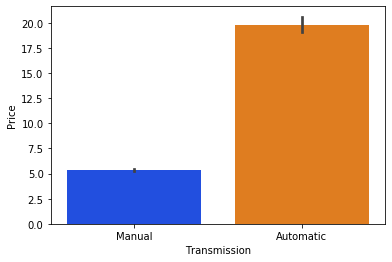

In [89]:
sns.barplot(x='Transmission',y='Price',data=df,palette='bright')

The plots show us that although the number of cars with manual transmission are more in number,cars with automatic transmission cost more.

### Owner_Type vs Prices


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

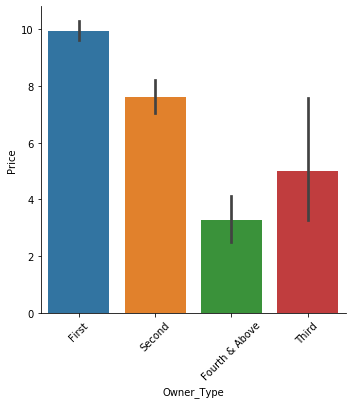

In [90]:
sns.catplot(x='Owner_Type',y='Price',kind='bar',data=df)
plt.xticks(rotation=45)

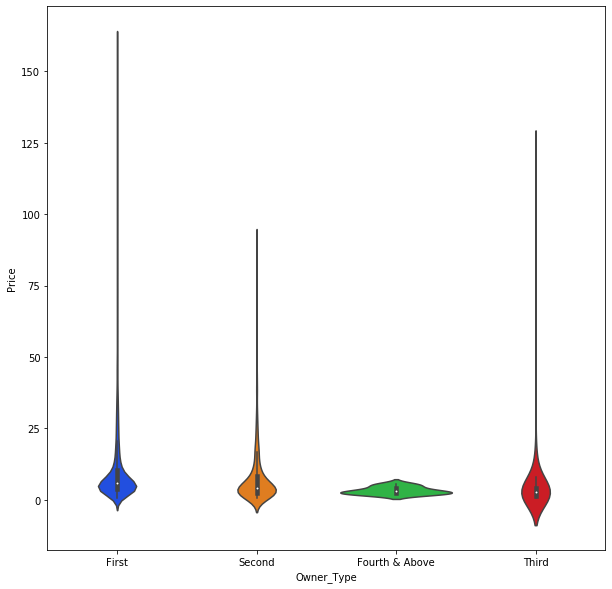

In [91]:
plt.figure(figsize=(10,10))
sns.violinplot(y='Price',x='Owner_Type',data=df,palette='bright')

The plots show that third ownership onwards the car prices drop .

### Dependent numerical continuous variables vs Price

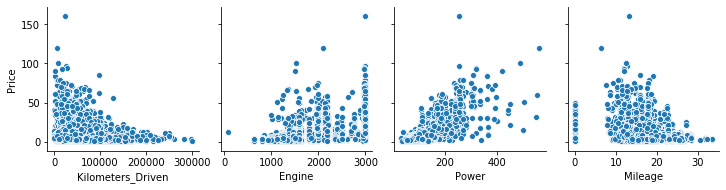

In [92]:
sns.pairplot(data=df,y_vars='Price',x_vars=['Kilometers_Driven','Engine','Power','Mileage'])

The pairplot shows us the relation between the Price variable and the different numerical variables in the dataset.

The variables engine and power show a positive linear relationship with the target(Price).
Whereas the variables Kilometers_Driven and Mileage_per_l show a negative collinearity.


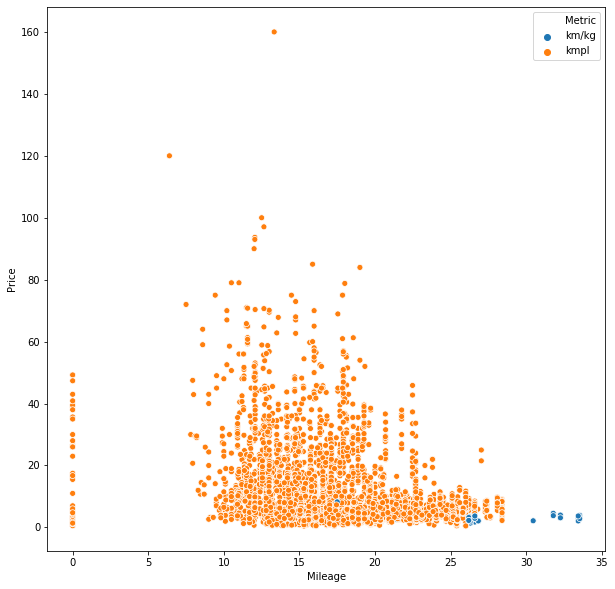

In [93]:
dfplot=pd.read_excel('Data_Train.xlsx')
dfplot[['Mileage','Metric']] = dfplot.Mileage.str.split(expand=True)
dfplot['Mileage']=dfplot['Mileage'].astype(float)
dfplot['Mileage'].fillna(dfplot['Mileage'].mean(),inplace=True)
plt.figure(figsize=(10,10))
sns.scatterplot(x='Mileage',y='Price',hue='Metric',data=dfplot)

### Seats vs Price

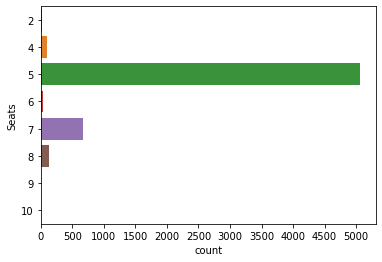

In [94]:
import matplotlib.ticker as ticker
ax=sns.countplot(y='Seats',data=df_int)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

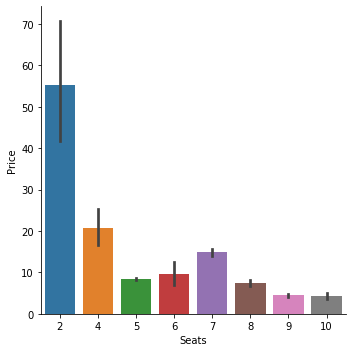

In [95]:
sns.catplot(x='Seats',y='Price',kind='bar',data=df)


Most number of cars have 5 seats .

The price of 2 seater cars are the most.

<h1 align= center> <font size=6> MODEL IMPLEMENTATION </h1></font>

# CONVERSION OF STRINGS TO INTEGERS USING ONE-HOT ENCODING

In [96]:
d=list(range(0,6012))
df["Index"]=d
t=list(range(0,1234))
test["Index"]=t ## We will be using inner join to join all the one hot encoded dataframes and their key would be index

Below we have converted every string column into a sequence of binary digits so that it can be passed in linear regression.

# BRAND

In [97]:
brand=np.array(df['Brand'])
brand_data= pd.DataFrame({"Brand":brand})
brand_data=pd.get_dummies(brand_data)
train_brand=brand_data
train_brand["Index"]=d
brand=np.array(test['Brand'])
brand_data= pd.DataFrame({"Brand":brand})
brand_data=pd.get_dummies(brand_data)
test_brand=brand_data
test_brand["Index"]=t

# LOCATION

In [98]:
location=np.array(df['Location'])
location_data= pd.DataFrame({"Location":location})
location_data=pd.get_dummies(location_data)
train_location=location_data
train_location["Index"]=d
location=np.array(test['Location'])
location_data= pd.DataFrame({"Location":location})
location_data=pd.get_dummies(location_data)
test_location=location_data
test_location["Index"]=t

# FUEL TYPE

In [99]:
fuel=np.array(df['Fuel_Type'])
fuel_data= pd.DataFrame({"Fuel_Type":fuel})
fuel_data=pd.get_dummies(fuel_data)
train_fuel=fuel_data
train_fuel["Index"]=d
fuel=np.array(test['Fuel_Type'])
fuel_data= pd.DataFrame({"Fuel_Type":fuel})
fuel_data=pd.get_dummies(fuel_data)
test_fuel=fuel_data
test_fuel["Index"]=t

# TRANSMISSION

In [100]:
trans=np.array(df['Transmission'])
trans_data= pd.DataFrame({"Transmission":trans})
trans_data=pd.get_dummies(trans_data)
train_trans=trans_data
train_trans["Index"]=d
trans=np.array(test['Transmission'])
trans_data= pd.DataFrame({"Transmission":trans})
trans_data=pd.get_dummies(trans_data)
test_trans=trans_data
test_trans["Index"]=t

# OWNER TYPE

In [101]:
own=np.array(df['Owner_Type'])
own_data= pd.DataFrame({"Owner_Type":own})
own_data=pd.get_dummies(own_data)
train_own=own_data
train_own["Index"]=d
own=np.array(test['Owner_Type'])
own_data= pd.DataFrame({"Owner_Type":own})
own_data=pd.get_dummies(own_data)
test_own=own_data
test_own["Index"]=t

# SUBSTITUTING STRING COLUMNS WITH NEW COLUMNS

In [102]:
df.drop(["Brand","Location","Fuel_Type","Transmission","Owner_Type"],axis=1, inplace=True)
test.drop(["Brand","Location","Fuel_Type","Transmission","Owner_Type"],axis=1, inplace=True)
final_test= test
df=df.merge(train_own, on='Index')
df=df.merge(train_trans, on='Index')
df=df.merge(train_fuel, on='Index')
df=df.merge(train_location, on='Index')
df=df.merge(train_brand, on='Index')
test=test.merge(test_own, on='Index')
test=test.merge(test_trans, on='Index')
test=test.merge(test_fuel, on='Index')
test=test.merge(test_location, on='Index')
test=test.merge(test_brand, on='Index')

In [103]:
features= list(df.columns)   ## features that are being removed because they are either not in test set or do not play important role in predicting the car price
features.remove("Brand_Smart")
features.remove("Price")
features.remove("Fuel_Type_Electric")
features.remove("Brand_Ambassador")
features.remove("Brand_Lamborghini")
features.remove("Brand_Force")
features.remove("Index") ## index was only used to join the dataframes, we do not need it anymore

In [104]:
df

,Year,Kilometers_Driven,Engine,Power,Mileage,Seats,Price,Index,Owner_Type_First,Owner_Type_Fourth & Above,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000.0,998.0,58.16,26.60,5,1.75,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000.0,1582.0,126.20,19.67,5,12.50,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000.0,1199.0,88.70,18.20,5,4.50,2,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000.0,1248.0,88.76,20.77,7,6.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670.0,1968.0,140.80,15.20,5,17.74,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,2014,27365.0,1248.0,74.00,28.40,5,4.75,6007,1,0,...,0,0,0,0,0,0,0,0,0,0
6008,2015,100000.0,1120.0,71.00,24.40,5,4.00,6008,1,0,...,0,0,0,0,0,0,0,0,0,0
6009,2012,55000.0,2498.0,112.00,14.00,8,2.90,6009,0,0,...,0,0,0,0,0,0,0,0,0,0
6010,2013,46000.0,998.0,67.10,18.90,5,2.65,6010,1,0,...,0,0,0,0,0,0,0,0,0,0


The dataframe is a result of combining many dataframes which are encoded in 0s and 1s.

In [105]:
test.drop('Brand_Hindustan',axis=1,inplace=True)
test.drop('Brand_OpelCorsa',axis=1,inplace=True) ## The two columns were not a part of train dataframe so this is beyond our scope.

## LINEAR REGRESSION USING ALL THE FEATURES

In [106]:
lm=LinearRegression()
X=df[features]
Y=df['Price']
lm.fit(X,Y)
lm.score(X,Y)

0.7775702258094346

By only fitting data using Linear Regression we have an accuracy of 77%. Next we will try to use a pipeline and see if we get better results.

In [107]:
test[features]

,Year,Kilometers_Driven,Engine,Power,Mileage,Seats,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2014,40929,998.0,58.200000,32.26,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,796.0,47.300000,24.70,5,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,34000,2393.0,147.800000,13.68,7,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2012,139000,1364.0,108.396458,23.59,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,29000,1197.0,82.850000,18.50,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,1598.0,103.600000,20.54,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1230,2015,59000,1197.0,103.600000,17.21,5,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1231,2012,28000,1461.0,63.100000,23.08,5,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1232,2013,52262,1197.0,103.600000,17.20,5,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


As we can see "features" consists of columns which are a part of both test and train dataset.

## FINAL TOUCHES BY POLYNOMIAL REGRESSION AND PIPELINE

In [108]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [109]:
pipe=Pipeline(Input)
model=pipe.fit(X,Y)
pipe.score(X,Y)

0.9455975076708404

After fitting our model with a pipeline we have reached an accuracy of 94%.

In [110]:
car_prices= pipe.predict(test[features])
final_test["Price"]=car_prices
final_test

,Year,Kilometers_Driven,Engine,Mileage,Power,Seats,Index,Price
0,2014,40929,998.0,32.26,58.200000,4,0,2.833069
1,2013,54493,796.0,24.70,47.300000,5,1,2.791809
2,2017,34000,2393.0,13.68,147.800000,7,2,16.796753
3,2012,139000,1364.0,23.59,108.396458,5,3,8.758789
4,2014,29000,1197.0,18.50,82.850000,5,4,4.103271
...,...,...,...,...,...,...,...,...
1229,2011,89411,1598.0,20.54,103.600000,5,1229,4.414124
1230,2015,59000,1197.0,17.21,103.600000,5,1230,5.671967
1231,2012,28000,1461.0,23.08,63.100000,5,1231,2.490906
1232,2013,52262,1197.0,17.20,103.600000,5,1232,5.975281


The above dataset is the final dataset we present which contains the price of the test dataset.

## TEAM MEMBERS: 

Anoushka Sinha: Data cleansing and exploratory data analysis.

Srashti Gangil: Data cleansing and exploratory data analysis.

Mohit Kamal: Data cleansing and exploratory data analysis.

Mahaan Mitra: Model Implementation.

Sarthak Srivastava: Model Implementation.

Vikash Tiwari: Model Implementation.

Kalpit Gupta: Model Implementation.

Nishant Athawale: Project Report.